In [74]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy import optimize
import matplotlib.pyplot as plt
#matplotlib.rc('font', **font)
cstring = 'rgbcmyk'
import matplotlib as ml
%matplotlib inline
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =True
ml.rc('font', family='serif',size=16)

In [75]:
g0 = 3100
g1 = 380
g3 = 290
g4 = 141
Dtp = 10.5

def getBMatrix(kx, ky, Dt, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    Hl = np.array([[(-Dt - mu)*idt, v0 * pc, -v4 * pc, -v3 * p],
                   [v0 * p, (-Dt + Dtp - mu) * idt, g1 * idt, -v4 * pc],
                   [-v4 * p, g1 * idt, (Dt + Dtp - mu) * idt, v0 * pc],
                   [-v3 * pc, v4 * p, v0 * p, (Dt - mu) * idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

In [85]:
kmax = 0.15
kr = np.linspace(-kmax,kmax, 1000)
Dl=20
KX, KY = np.meshgrid(kr, kr)
w, v = np.linalg.eigh(getBMatrix(KX, KY, Dl, 0.0, 1))

In [86]:
Sz = np.diag([1,1,-1,-1])
SzMh = np.einsum('ijk, kl, ijl->ij', np.conj(v[:,:,:,1]), Sz, v[:,:,:,1])
S0 = np.diag([1,1,1,1])
S0Mh = np.einsum('ijk, kl, ijl->ij', np.conj(v[:,:,:,1]), S0, v[:,:,:,1])
SzMlh = np.real(SzMh / S0Mh)

In [87]:
Sz = np.diag([1,1,-1,-1])
SzMe = np.einsum('ijk, kl, ijl->ij', np.conj(v[:,:,:,2]), Sz, v[:,:,:,2])
S0 = np.diag([1,1,1,1])
S0Me = np.einsum('ijk, kl, ijl->ij', np.conj(v[:,:,:,2]), S0, v[:,:,:,2])
SzMle = np.real(SzMe / S0Me)

In [88]:
SzMl = np.array([SzMlh, SzMle])

In [89]:
mul = np.linspace(-150,150,40000,endpoint=True)
Sp = np.zeros(mul.shape)
indeh = 0
for im, mull in np.ndenumerate(mul):
    if np.abs(mull)<20:
        indh = np.where(np.abs(w[:,:,1]-mull)<4e-3)
        inde = np.where(np.abs(w[:,:,2]-mull)<4e-3)
        if len(inde[0]) > len(inde[1]):
            ind = inde 
            indeh = 1
        else:
            ind = indh
            indeh = 0
    elif mull<0:
        ind = np.where(np.abs(w[:,:,1]-mull)<4e-3)
        indeh = 0
    else:
        ind = np.where(np.abs(w[:,:,2]-mull)<4e-3)
        indeh = 1
    Sp[im] = np.mean(SzMl[indeh, ind[0],ind[1]]) if len(ind[0]>0) else None

In [90]:
from scipy.signal import savgol_filter
Sps = savgol_filter(Sp, 81, 3)

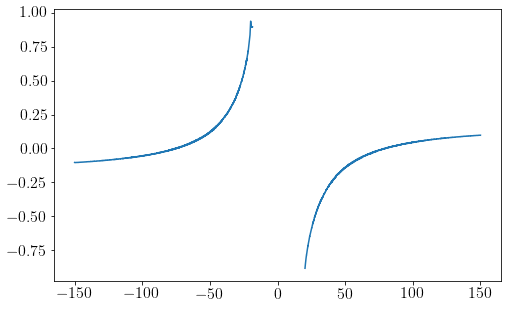

In [92]:
plt.plot(mul, Sps)
#plt.plot(mul, Sp)
#plt.xlim([-150,-100])

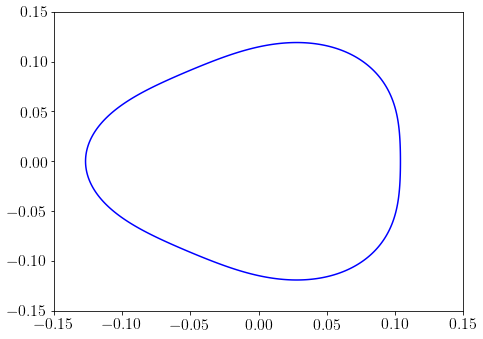

In [66]:
ml.rcParams['figure.figsize'] = (7.0, 5.0)
ml.rcParams['contour.negative_linestyle']= 'solid'
mul=-150
fig, ax= plt.subplots(1,1)
ax.contour(KX, KY, w[:,:,1],[mul],colors='b')
#ax.set(adjustable='box', aspect='equal')
plt.tight_layout()
plt.show()

In [94]:
!pwd

/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode


In [96]:
with open('SpDataBilayer.npy', 'rb') as f:
    Spl = np.load(f,allow_pickle=True)

OSError: Failed to interpret file <_io.BufferedReader name='SpDataBilayer.npy'> as a pickle